In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

# load the data

In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
df_sub  = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')

# Preprocessing

In [4]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df_train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [6]:
df_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
df_train['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [8]:
dft = df_train.drop('id',axis = 1)

In [9]:
dft.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
dft.drop_duplicates(inplace=True)

In [11]:
dft.shape

(20758, 17)

# targert variable 

In [12]:
x = dft.drop('NObeyesdad', axis=1)  
y = dft['NObeyesdad']  

# encoding

In [13]:
le = LabelEncoder()
sc = StandardScaler()

In [14]:
categorical_columns = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','CAEC','CALC','MTRANS']  
for col in categorical_columns:
    x[col] = le.fit_transform(x[col])

In [15]:
print(x.dtypes)

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
dtype: object


In [16]:
numerical_columns = ['Age', 'Height', 'Weight','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'CALC', 'MTRANS']

# Scale numerical columns using StandardScaler
for num_col in numerical_columns:
    x[num_col] = sc.fit_transform(x[[num_col]])

In [17]:
print(x.dtypes)

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                              float64
MTRANS                            float64
dtype: object


In [18]:
x.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.105699,-0.002828,-0.235713,1,1,-0.836279,0.314684,2,0,1.206594,0,-1.171141,0.597438,-0.471288,0.429319
1,0,-1.027052,-1.606291,-1.170931,1,1,-0.836279,0.338364,1,0,-0.048349,0,0.021775,0.636513,1.639846,-2.182324
2,0,-1.027052,0.128451,-1.430012,1,1,-1.060332,-1.913423,2,0,-0.195644,0,-0.138022,1.755239,1.639846,0.429319
3,0,-0.507929,0.120090,1.644770,1,1,1.039171,0.338364,2,0,-0.584035,0,0.579896,0.271455,-0.471288,0.429319
4,1,1.371197,2.450367,0.224054,1,1,0.438397,-1.119801,2,0,-0.081469,0,1.176486,0.523111,-0.471288,0.429319


In [19]:
y = le.fit_transform(y)

# data split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

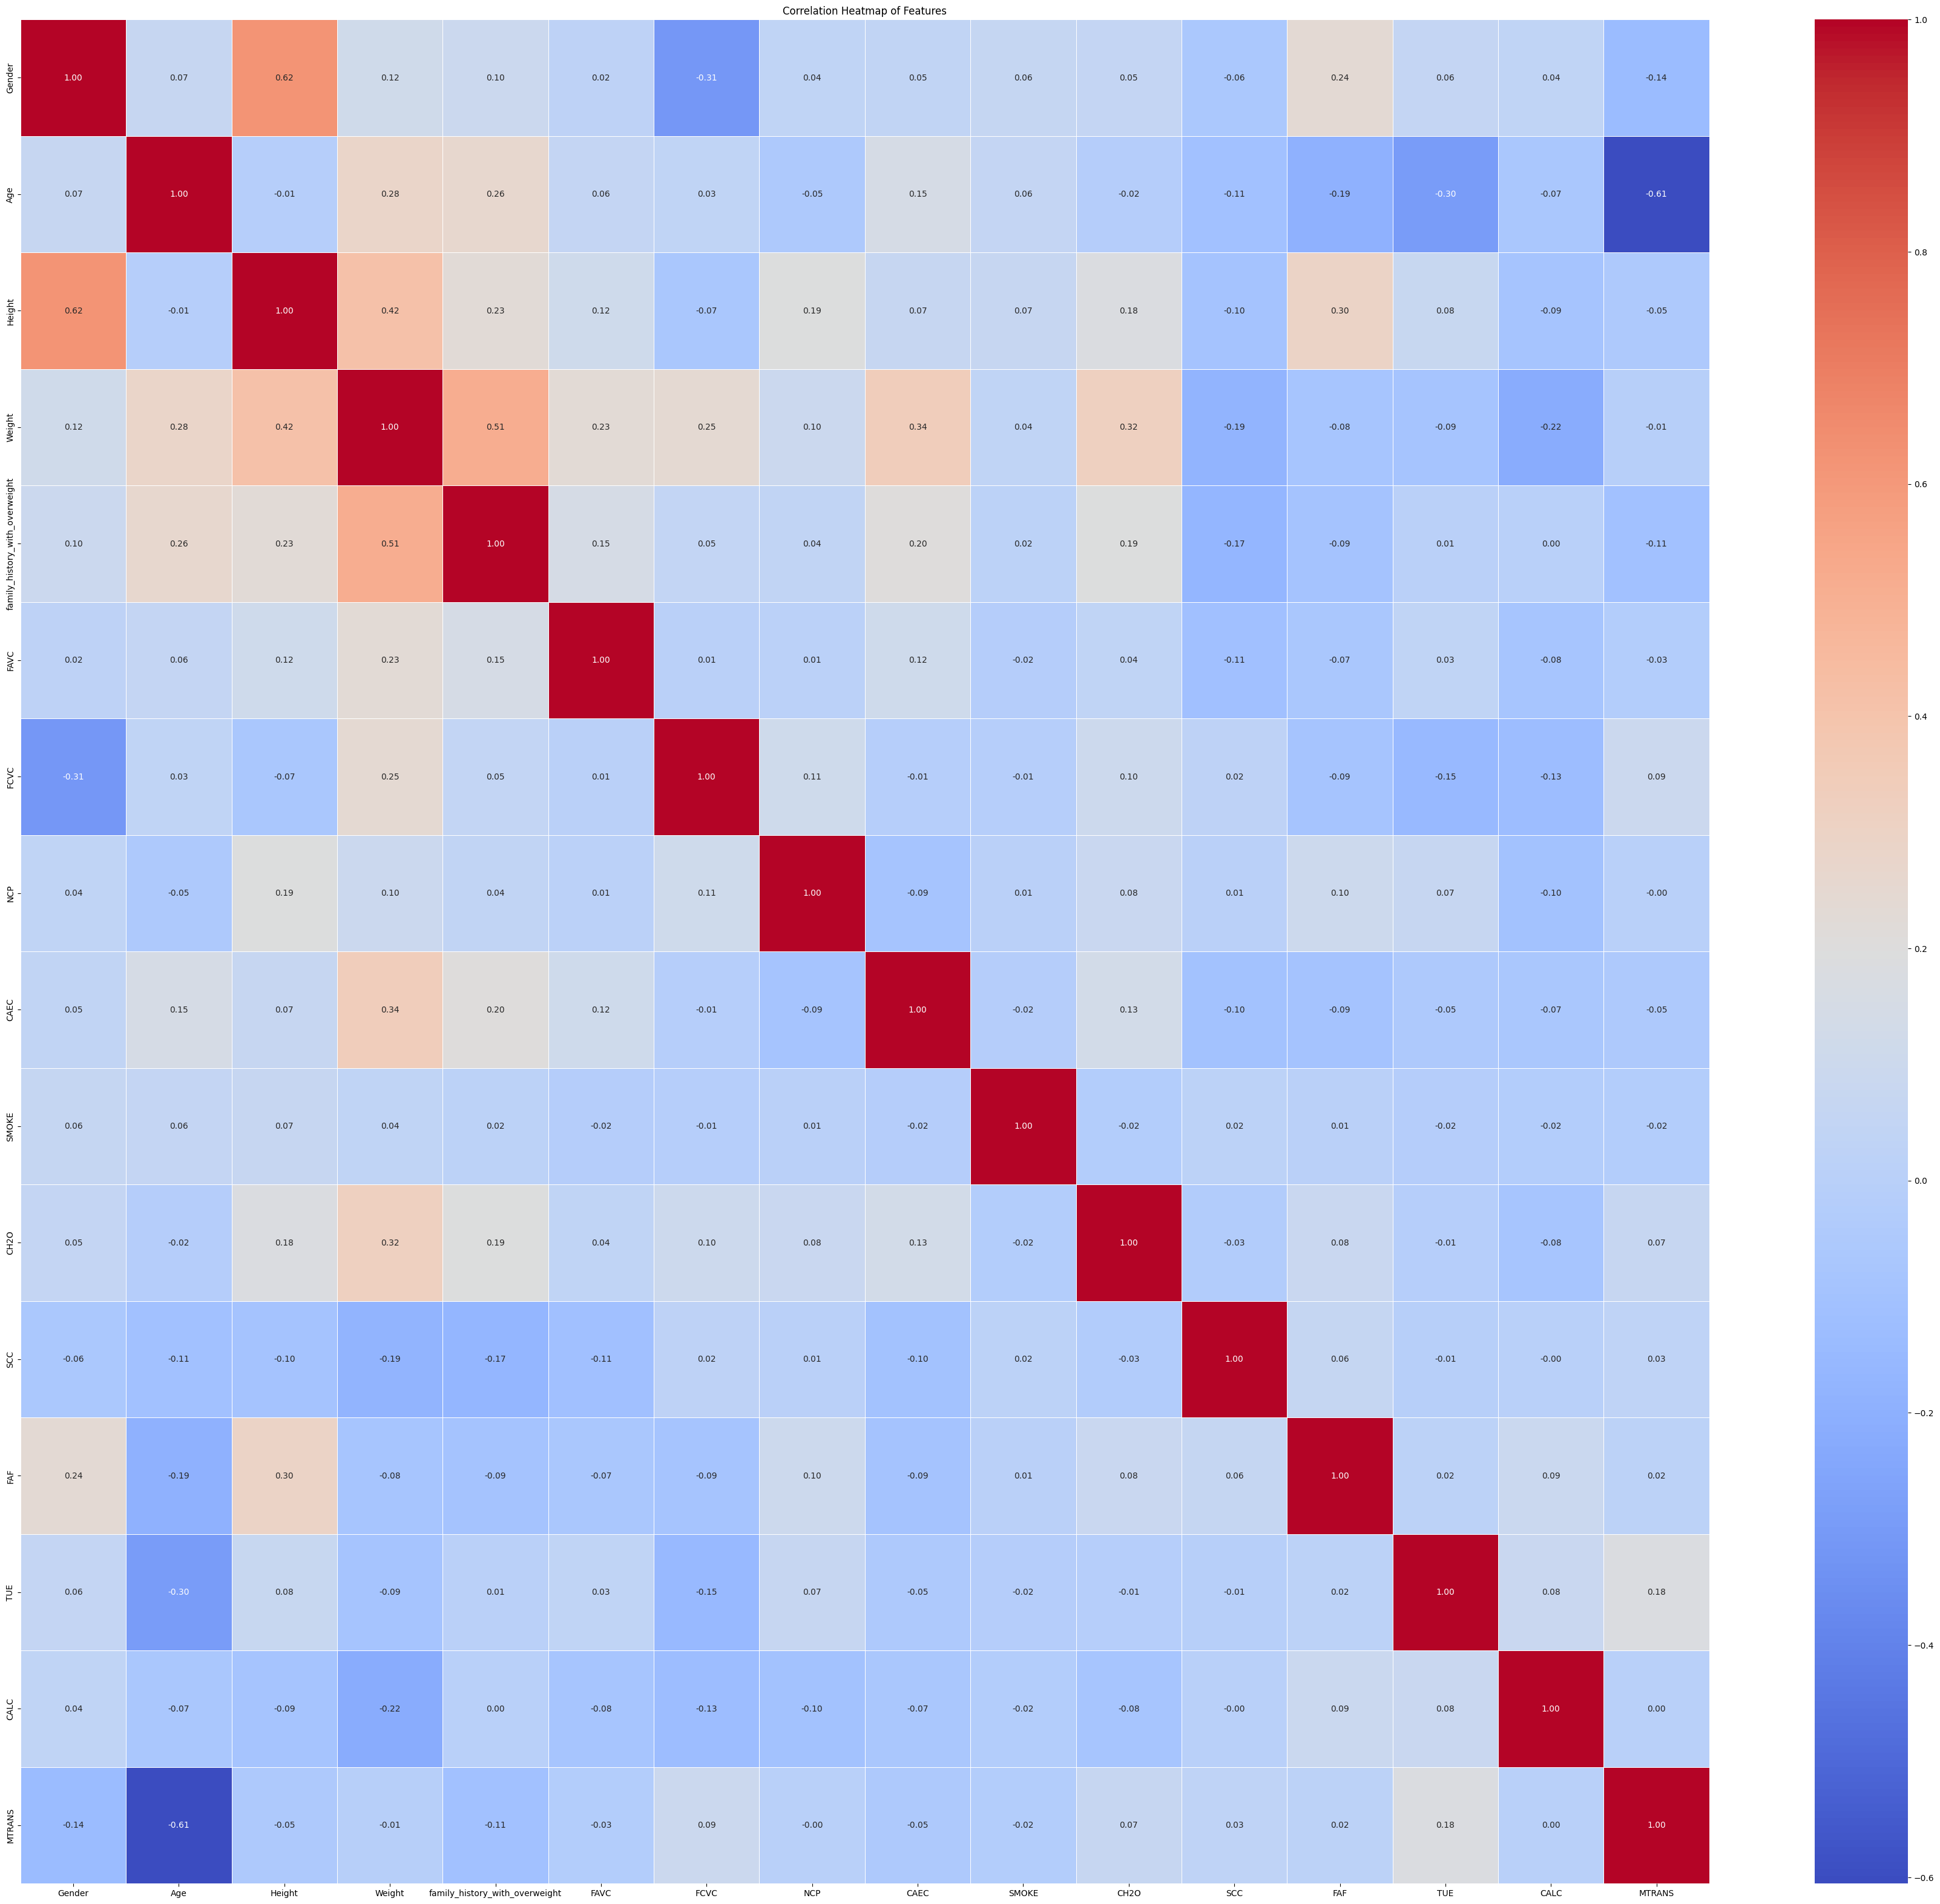

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


scaler = StandardScaler()
acc_corr_nor=scaler.fit_transform(x)
acc_corr_nor_df = pd.DataFrame(acc_corr_nor, columns=x.columns)
correlation_matrix = acc_corr_nor_df.corr()

# Create a heatmap
plt.figure(figsize=(45, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Training

# Linear regression

In [22]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Handling class imbalance using oversampling and undersampling
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [23]:
# linear regression with class imbalance handling
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,recall_score,precision_score

lr_model = LogisticRegression()
lr_pipeline = Pipeline([
    ('over_sampler', over_sampler),
    ('under_sampler', under_sampler),
    ('lr_model', lr_model)
])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_pipeline.fit(X_train_scaled, y_train)
lr_predictions = lr_pipeline.predict(X_test_scaled)
print("Logisticr= regression Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))
cm_lr_pca=confusion_matrix(y_test, lr_predictions)

Logisticr= regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       524
           1       0.87      0.76      0.81       626
           2       0.83      0.83      0.83       543
           3       0.96      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.68      0.74      0.71       484
           6       0.71      0.68      0.70       514

    accuracy                           0.86      4152
   macro avg       0.84      0.85      0.84      4152
weighted avg       0.86      0.86      0.86      4152

Accuracy: 0.859344894026975


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [25]:
ids=df_test['id']

In [26]:
dfv = df_test.drop('id', axis = 1)

In [27]:
dfv.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [28]:
categorical_columns = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','CAEC','CALC','MTRANS']  
for col in categorical_columns:
    dfv[col] = le.fit_transform(dfv[col])

In [29]:
numerical_columns = ['Age', 'Height', 'Weight','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'CALC', 'MTRANS']

# Scale numerical columns using StandardScaler
for num_col in numerical_columns:
    dfv[num_col] = sc.fit_transform(dfv[[num_col]])

In [30]:
dfv.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.508163,1.682789,1.273786,1,1,0.932524,0.350808,2,0,1.298389,0,-0.141769,-1.005016,-0.479492,0.437722
1,0,-0.509128,-1.114658,-0.818988,1,1,-0.833161,-2.462523,2,0,1.583678,0,0.030307,-1.005016,-0.479492,0.437722
2,0,0.353000,-0.626191,0.927432,1,1,1.047997,0.350808,2,0,0.965029,0,-1.159701,-0.592995,-0.479492,0.437722
3,1,-0.512705,-1.642760,0.623672,1,1,-0.833161,0.319733,2,0,1.234234,0,-1.046828,-1.005016,-0.479492,0.437722
4,0,0.353000,-0.805996,0.668336,1,1,1.047997,0.350808,2,0,1.016818,0,-1.159701,0.213881,-0.479492,0.437722


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
# Decision Tree with class imbalance handling
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_pipeline = Pipeline([
    ('over_sampler', over_sampler),
    ('under_sampler', under_sampler),
    ('dt_model', dt_model)
])

dt_pipeline.fit(X_train, y_train)
dt_predictions = dt_pipeline.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))
cm_dt=confusion_matrix(y_test, dt_predictions)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       524
           1       0.80      0.81      0.80       626
           2       0.81      0.78      0.80       543
           3       0.96      0.95      0.96       657
           4       0.99      1.00      0.99       804
           5       0.69      0.68      0.68       484
           6       0.69      0.74      0.71       514

    accuracy                           0.85      4152
   macro avg       0.83      0.83      0.83      4152
weighted avg       0.85      0.85      0.85      4152

Accuracy: 0.846820809248555


In [33]:
# Random Forest with class imbalance handling
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_pipeline = Pipeline([
    ('over_sampler', over_sampler),
    ('under_sampler', under_sampler),
    ('rf_model', rf_model)
])

rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))
cm_rf=confusion_matrix(y_test, rf_predictions)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       524
           1       0.86      0.88      0.87       626
           2       0.89      0.85      0.87       543
           3       0.97      0.98      0.97       657
           4       1.00      1.00      1.00       804
           5       0.76      0.77      0.77       484
           6       0.79      0.80      0.79       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

Accuracy: 0.8971579961464354


In [34]:
# Neural Network (Artificial Neural Network - ANN) with class imbalance handling
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ann_model = MLPClassifier(random_state=42)
ann_model.fit(X_train_scaled, y_train)
ann_predictions = ann_model.predict(X_test_scaled)
print("\nArtificial Neural Network Classification Report:")
print(classification_report(y_test, ann_predictions))
print("Accuracy:", accuracy_score(y_test, ann_predictions))
cm_ann=confusion_matrix(y_test, ann_predictions)


Artificial Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       524
           1       0.85      0.83      0.84       626
           2       0.83      0.87      0.85       543
           3       0.97      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.71      0.76      0.74       484
           6       0.75      0.69      0.72       514

    accuracy                           0.87      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.87      0.87      0.87      4152

Accuracy: 0.8740366088631984


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# predictions


In [35]:
y_pred = rf_model.predict(dfv)

# Create a DataFrame with the test predictions
test_results1 = pd.DataFrame({'NObeyesdad': y_pred})

# Concatenate the predictions with the test data
test_results = pd.concat([ids, test_results1], axis=1)

In [36]:
test_results.head()

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4


In [37]:
# Save the results to a CSV file
test_results.to_csv('submission.csv', index=False)